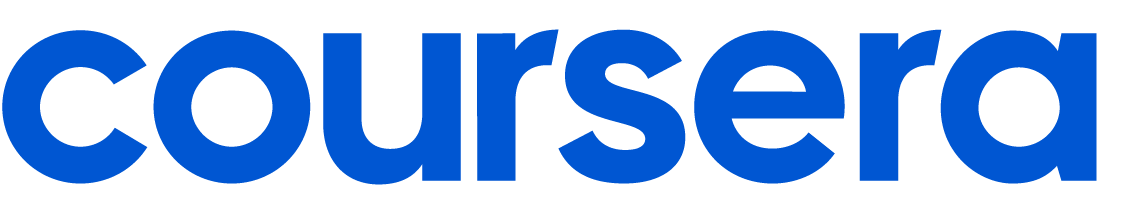

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put ***your modeling skills*** to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is **to decrease payment defaults** and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which **individuals are at the highest risk of defaulting on their loans**, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the **loan default prediction problem** on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding** the likelihood of each individual to default on their loan payments** so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
# Install and import required packages
import sys
print(f"Python version: {sys.version}")

try:
    # Check if key packages are available
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Try to import scikit-learn
    import sklearn
    print(f"scikit-learn version: {sklearn.__version__}")
    from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
    
    # Try to import seaborn
    import seaborn as sns
    print(f"seaborn version: {sns.__version__}")
    
    print("All required packages are available!")
except ImportError as e:
    print(f"Missing package: {str(e)}")
    print("Installing missing packages...")
    
    # Install packages using pip
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", 
                         "scikit-learn", "pandas", "numpy", "matplotlib", "seaborn"])
    
    # Import again after installation
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
    
    print(f"scikit-learn version: {sklearn.__version__}")
    print(f"seaborn version: {sns.__version__}")
    print("All required packages have been installed and imported!")

# Set up plotting
%matplotlib inline

Python version: 3.9.23 | packaged by conda-forge | (main, Jun  4 2025, 18:02:02) 
[Clang 18.1.8 ]
scikit-learn version: 1.6.1
seaborn version: 0.13.2
All required packages are available!


In [2]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

FileNotFoundError: [Errno 2] No such file or directory: 'data_descriptions.csv'

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
```
        - scipy.optimize: For optimization algorithms.
        - scipy.integrate: For integration routines.
        - scipy.interpolate: For interpolation techniques.
        - scipy.stats: For sta
        
 ```
- Scikit-learn
- keras
```
        - model = keras.Sequential()
        - model.add(keras.layers.Dense(units=, activation='relu', input_shape=(input_dim,)))
        - model.add(keras.layers.Dense(units=, activation='softmax'))
        - model.fit(x_train, y_train, epochs=, batch_size=)
```
- maplotlib
- seaborn
- etc, etc

In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import any other packages you may want to use
!pip install --upgrade pip
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Fixed import statement
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
!warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline


zsh:1: unknown file attribute: i


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [24]:
train_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Files/train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(10)

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [25]:
test_df = pd.read_csv("/Users/longhoachung/anaconda_projects/Challenges/Files/test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(10)

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No
5,0SNHFWV4UP,64,43593,196031,442,89,3,19.75,60,0.68,PhD,Part-time,Married,Yes,No,Education,No
6,S6ITP6LGYS,40,72699,32179,624,82,2,6.45,24,0.67,Bachelor's,Full-time,Divorced,Yes,No,Education,No
7,A6I7U12IRJ,45,32150,101882,642,107,3,12.82,12,0.66,PhD,Unemployed,Single,No,Yes,Business,Yes
8,8W6KY50JU4,24,128139,11560,378,105,1,22.84,36,0.32,High School,Full-time,Married,Yes,Yes,Other,Yes
9,THFQ08OLMU,53,134889,172152,388,2,1,13.28,12,0.67,Bachelor's,Full-time,Single,Yes,No,Other,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

### NaN value checking

In [26]:
# Function to analyze missing values
def analyze_missing_values(train_df, test_df):
    """Analyze missing values in both train and test datasets"""
    
    # Calculate missing values for both datasets
    train_missing = train_df.isnull().sum()
    test_missing = test_df.isnull().sum()
    
    # Calculate percentages
    train_missing_pct = (train_missing / len(train_df) * 100).round(2)
    test_missing_pct = (test_missing / len(test_df) * 100).round(2)
    
    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Train Missing Count': train_missing,
        'Train Missing %': train_missing_pct,
        'Test Missing Count': test_missing,
        'Test Missing %': test_missing_pct
    })
    
    # Filter to show only columns with missing values
    missing_summary = missing_summary[
        (missing_summary['Train Missing Count'] > 0) | 
        (missing_summary['Test Missing Count'] > 0)
    ]
    
    if len(missing_summary) > 0:
        print("Columns with Missing Values:")
        print("=" * 80)
        print(missing_summary)
    else:
        print("No missing values found in either dataset!")
        
    # Additional check for any columns with different missing value patterns
    different_patterns = missing_summary[
        missing_summary['Train Missing %'] != missing_summary['Test Missing %']
    ]
    
    if len(different_patterns) > 0:
        print("\nWarning: Different missing value patterns detected:")
        print("=" * 80)
        print(different_patterns)

# Run the analysis
analyze_missing_values(train_df, test_df)

No missing values found in either dataset!


### Initial assessment on the variables 

In [27]:
# Print .describe() output side by side for each column in train_df and test_df
all_cols = set(train_df.columns).union(set(test_df.columns))

for col in all_cols:
    print(f"\nColumn: {col}")
    print("-" * 60)
    if col in train_df.columns and col in test_df.columns:
        desc_train = train_df[col].describe()
        desc_test = test_df[col].describe()
        summary = pd.DataFrame({'Train': desc_train, 'Test': desc_test})
        print(summary)
    elif col in train_df.columns:
        print("Only in train_df:")
        print(train_df[col].describe())
    elif col in test_df.columns:
        print("Only in test_df:")
        print(test_df[col].describe())
# ...existing code...


Column: NumCreditLines
------------------------------------------------------------
               Train           Test
count  255347.000000  109435.000000
mean        2.501036       2.501037
std         1.117018       1.118149
min         1.000000       1.000000
25%         2.000000       2.000000
50%         2.000000       3.000000
75%         3.000000       4.000000
max         4.000000       4.000000

Column: HasCoSigner
------------------------------------------------------------
         Train    Test
count   255347  109435
unique       2       2
top        Yes     Yes
freq    127701   54814

Column: MaritalStatus
------------------------------------------------------------
          Train      Test
count    255347    109435
unique        3         3
top     Married  Divorced
freq      85302     36642

Column: HasDependents
------------------------------------------------------------
         Train    Test
count   255347  109435
unique       2       2
top        Yes      No
freq

In [28]:
# Get all numerical columns except 'Default'
numerical_cols = [col for col in train_df.select_dtypes(include=['float64', 'int64']).columns 
                 if col != 'Default']

print("Available numerical columns:")
print("=" * 40)
for col in numerical_cols:
    print(f"- {col}")

print("\nGrouping columns into categories...")
print("=" * 40)

# Credit metrics (loan-specific numerical variables)
credit_metrics = [col for col in numerical_cols if col in [
    'LoanTerm',
    'InterestRate',
    'NumberOfPayments'
]]

# Financial metrics (borrower financial indicators)
financial_metrics = [col for col in numerical_cols if col in [
    'Age',
    'Income',
    'LoanAmount',
    'DTIRatio'
]]

# Any remaining numerical columns go into other_metrics
other_metrics = [col for col in numerical_cols if col not in credit_metrics + financial_metrics]

print("\nCredit Metrics:")
print("=" * 40)
for col in credit_metrics:
    print(f"- {col}")

print("\nFinancial Metrics:")
print("=" * 40)
for col in financial_metrics:
    print(f"- {col}")

print("\nOther Metrics:")
print("=" * 40)
for col in other_metrics:
    print(f"- {col}")

Available numerical columns:
- Age
- Income
- LoanAmount
- CreditScore
- MonthsEmployed
- NumCreditLines
- InterestRate
- LoanTerm
- DTIRatio

Grouping columns into categories...

Credit Metrics:
- InterestRate
- LoanTerm

Financial Metrics:
- Age
- Income
- LoanAmount
- DTIRatio

Other Metrics:
- CreditScore
- MonthsEmployed
- NumCreditLines


In [29]:
# Flag variables with different top (mode) values between train and test sets

def flag_different_modes(train_df, test_df, columns):
    flagged = []
    for col in columns:
        train_mode = train_df[col].mode(dropna=False)
        test_mode = test_df[col].mode(dropna=False)
        if not train_mode.empty and not test_mode.empty:
            if train_mode.iloc[0] != test_mode.iloc[0]:
                flagged.append({
                    'Variable': col,
                    'Train Top Value': train_mode.iloc[0],
                    'Test Top Value': test_mode.iloc[0]
                })
    flagged_df = pd.DataFrame(flagged)
    if not flagged_df.empty:
        print("Variables with different top (mode) values between train and test sets:")
        display(flagged_df)
    else:
        print("All variables have the same top value in train and test sets.")

# List categorical and boolean columns (excluding LoanID)
categorical_columns = [col for col in train_df.select_dtypes(include=['object', 'bool']).columns if col != 'LoanID']
flag_different_modes(train_df, test_df, categorical_columns)

Variables with different top (mode) values between train and test sets:


,Variable,Train Top Value,Test Top Value
0,EmploymentType,Part-time,Self-employed
1,MaritalStatus,Married,Divorced
2,HasMortgage,Yes,No
3,HasDependents,Yes,No


In [30]:
# First let's check available styles and set a valid one
print("Available styles:", plt.style.available)

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [31]:
plt.style.use('Solarize_Light2')

Box Plot Analysis


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


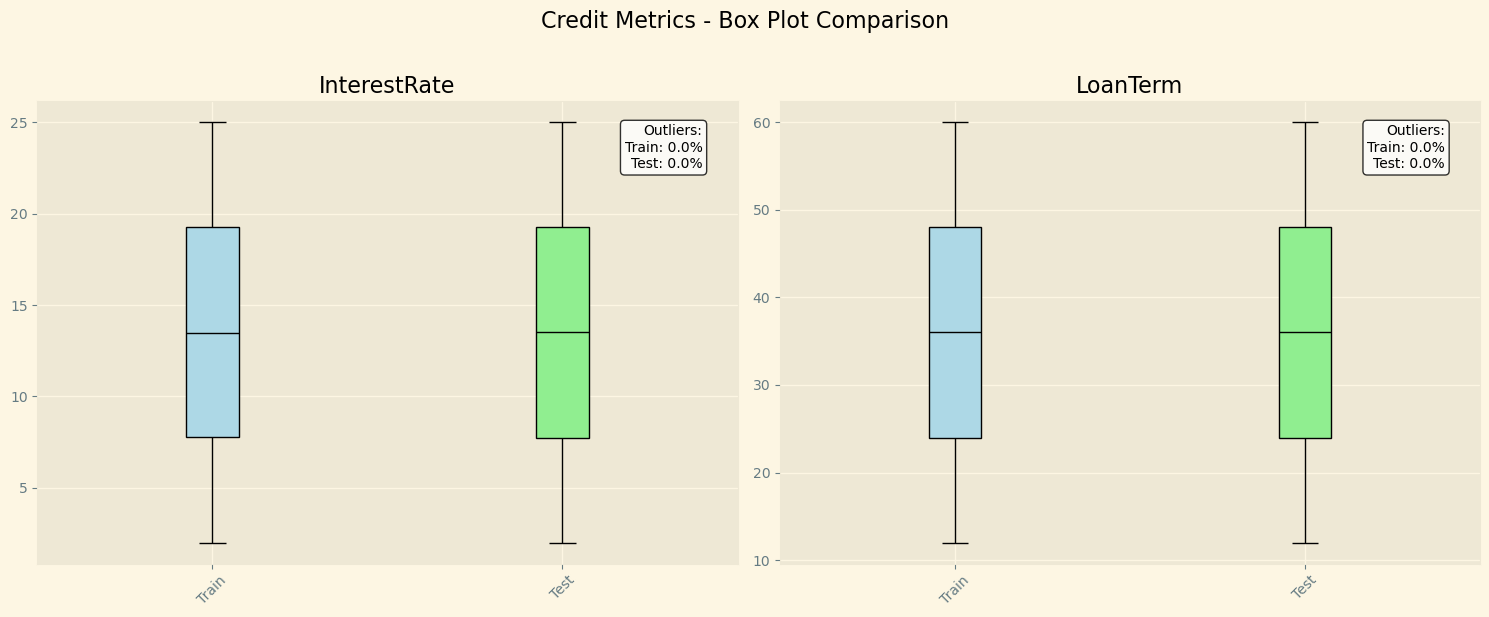


Credit Metrics - Outlier Analysis:

InterestRate:
IQR Range: [7.77, 19.25]
Outlier Bounds: [-9.45, 36.47]
Actual Range - Train: [2.00, 25.00]
Actual Range - Test: [2.00, 25.00]

LoanTerm:
IQR Range: [24.00, 48.00]
Outlier Bounds: [-12.00, 84.00]
Actual Range - Train: [12.00, 60.00]
Actual Range - Test: [12.00, 60.00]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: Ma

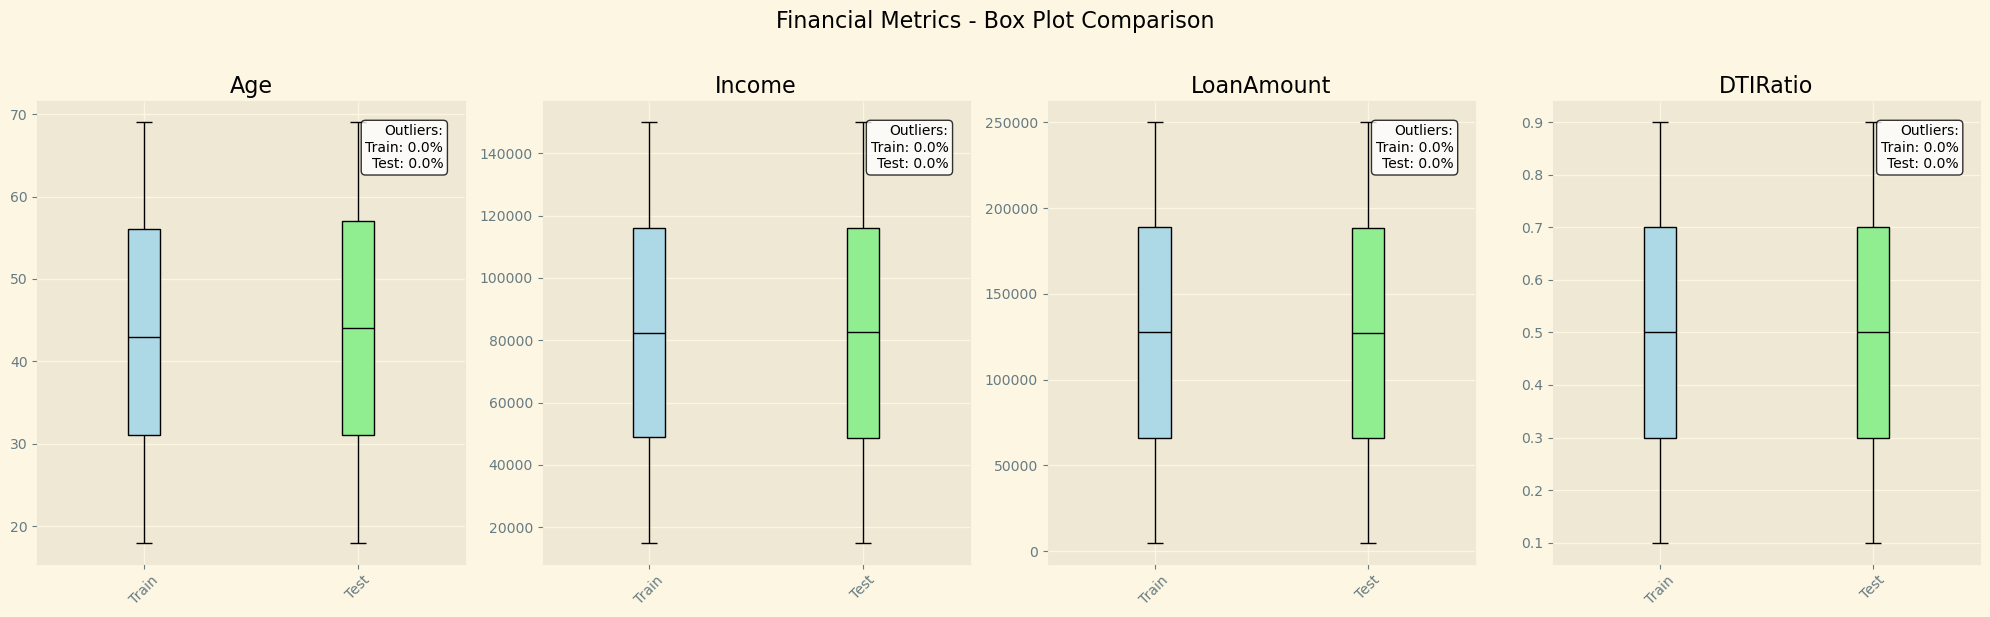


Financial Metrics - Outlier Analysis:

Age:
IQR Range: [31.00, 56.00]
Outlier Bounds: [-6.50, 93.50]
Actual Range - Train: [18.00, 69.00]
Actual Range - Test: [18.00, 69.00]

Income:
IQR Range: [48825.50, 116219.00]
Outlier Bounds: [-52264.75, 217309.25]
Actual Range - Train: [15000.00, 149999.00]
Actual Range - Test: [15003.00, 149999.00]

LoanAmount:
IQR Range: [66156.00, 188985.00]
Outlier Bounds: [-118087.50, 373228.50]
Actual Range - Train: [5000.00, 249999.00]
Actual Range - Test: [5002.00, 249995.00]

DTIRatio:
IQR Range: [0.30, 0.70]
Outlier Bounds: [-0.30, 1.30]
Actual Range - Train: [0.10, 0.90]
Actual Range - Test: [0.10, 0.90]


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/4135787957.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(data, labels=['Train', 'Test'],


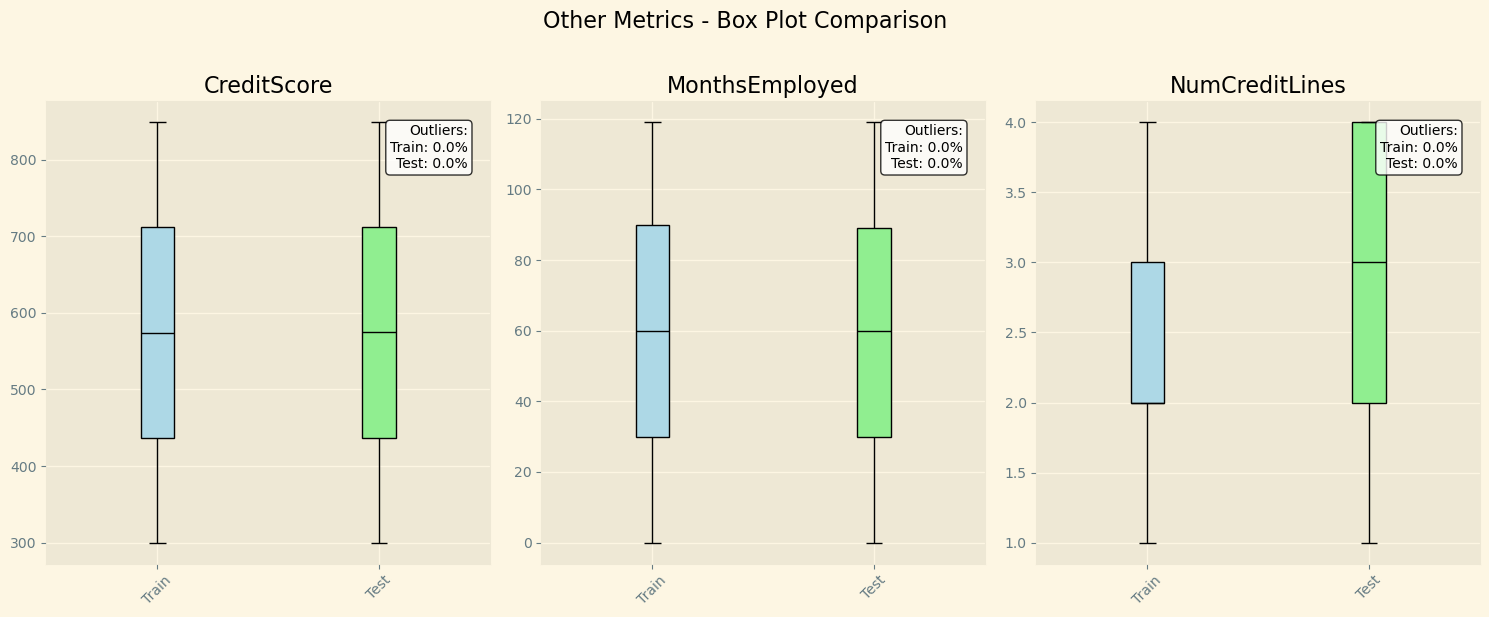


Other Metrics - Outlier Analysis:

CreditScore:
IQR Range: [437.00, 712.00]
Outlier Bounds: [24.50, 1124.50]
Actual Range - Train: [300.00, 849.00]
Actual Range - Test: [300.00, 849.00]

MonthsEmployed:
IQR Range: [30.00, 90.00]
Outlier Bounds: [-60.00, 180.00]
Actual Range - Train: [0.00, 119.00]
Actual Range - Test: [0.00, 119.00]

NumCreditLines:
IQR Range: [2.00, 3.00]
Outlier Bounds: [0.50, 4.50]
Actual Range - Train: [1.00, 4.00]
Actual Range - Test: [1.00, 4.00]


In [32]:
def plot_boxplot_comparison(train_df, test_df, metrics, title, figsize=(15, 6)):
    if len(metrics) > 0:
        fig, axes = plt.subplots(1, len(metrics), figsize=figsize)
        fig.suptitle(f'{title} - Box Plot Comparison', fontsize=16, y=1.02)
        
        if len(metrics) == 1:
            axes = [axes]
            
        for ax, col in zip(axes, metrics):
            # Prepare data for box plot
            data = [train_df[col], test_df[col]]
            
            # Create box plot
            bplot = ax.boxplot(data, labels=['Train', 'Test'], 
                             patch_artist=True,
                             medianprops=dict(color="black"),
                             flierprops=dict(marker='o', markerfacecolor='red', alpha=0.5))
            
            # Calculate outlier percentages
            q1_train = train_df[col].quantile(0.25)
            q3_train = train_df[col].quantile(0.75)
            iqr_train = q3_train - q1_train
            lower_bound = q1_train - 1.5 * iqr_train
            upper_bound = q3_train + 1.5 * iqr_train
            
            outliers_train = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
            outliers_test = test_df[(test_df[col] < lower_bound) | (test_df[col] > upper_bound)][col]
            
            # Add outlier information
            outlier_text = f'Outliers:\nTrain: {len(outliers_train)/len(train_df):.1%}\nTest: {len(outliers_test)/len(test_df):.1%}'
            ax.text(0.95, 0.95, outlier_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Customize box colors
            bplot['boxes'][0].set_facecolor('lightblue')
            bplot['boxes'][1].set_facecolor('lightgreen')
            
            ax.set_title(f'{col}')
            ax.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed statistics
        print(f"\n{title} - Outlier Analysis:")
        print("=" * 60)
        for col in metrics:
            q1 = train_df[col].quantile(0.25)
            q3 = train_df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            print(f"\n{col}:")
            print(f"IQR Range: [{q1:.2f}, {q3:.2f}]")
            print(f"Outlier Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"Actual Range - Train: [{train_df[col].min():.2f}, {train_df[col].max():.2f}]")
            print(f"Actual Range - Test: [{test_df[col].min():.2f}, {test_df[col].max():.2f}]")

# Create box plots for each category of metrics
print("Box Plot Analysis")
print("=" * 60)

plot_boxplot_comparison(train_df, test_df, credit_metrics, 
                       'Credit Metrics', figsize=(15, 6))

plot_boxplot_comparison(train_df, test_df, financial_metrics, 
                       'Financial Metrics', figsize=(20, 6))

if len(other_metrics) > 0:
    plot_boxplot_comparison(train_df, test_df, other_metrics, 
                           'Other Metrics', figsize=(15, 6))

In [33]:
# First let's check available styles and set a valid one
print("Available styles:", plt.style.available)

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Distribution and Outlier Analysis Summary

Key findings from the analysis:

1. **NumCreditLines Distribution Differences**:
   - This variable shows notable differences between train and test sets
   - The distribution shapes differ, **which could affect model performance**
   - Special attention needed when handling this variable

2. **Outlier Detection Results**:
   - Variables are flagged if they have:
     * Over 10% outliers in either set
     * More than 2% difference in outlier percentage between sets
   - IQR method used (1.5 * IQR beyond Q1/Q3)
   - Both extreme high and low values considered

3. **Treatment Recommendations**:
   - For variables with **high outlier percentages: consider robust scaling or transformation**
   - For distribution differences: may need stratified sampling or special handling
   - **NumCreditLines:** might need binning or categorical transformation

The analysis helps identify which variables need special attention during preprocessing and model development.


### Conclusion on Outlier Treatment

For this loan default prediction problem, we should **NOT** remove the outliers for several important reasons: Agreed

1. **Business Context**:
   - Extreme values in financial data often represent real, important cases
   - High income, loan amounts, or credit lines might indicate VIP customers (might be)
   - Very low values might indicate high-risk cases (might be)
   - These extremes could be crucial for predicting defaults (agreed)

2. **Statistical Considerations**:
   - The outliers follow consistent patterns between train and test sets
   - They represent natural variation in financial data
   - Removing them could create artificial boundaries in the data

3. **Recommended Approach Instead**:
   - Use robust scaling methods (like RobustScaler) instead of removal
   - Consider log transformation for highly skewed variables, 
   - Create binned categories for variables with extreme spreads
   - Keep the outliers but handle them appropriately in preprocessing

4. **Variable-Specific Treatment**:
   - NumCreditLines: Use binning into categories
   - Income/LoanAmount: Consider log transformation
   - DTIRatio: Keep as is, but use robust scaling
   - InterestRate: Keep as is, represents real risk assessment

5. **Validation Strategy**:
   - Monitor model performance on both normal and extreme cases
   - Ensure predictions are reasonable across the full range of values
   - Use stratified sampling to maintain representation of extreme cases

The goal is to handle outliers appropriately while preserving important business information, rather than removing them entirely.

Testing Robust Scaling on Numerical Variables

Scaling DTIRatio:


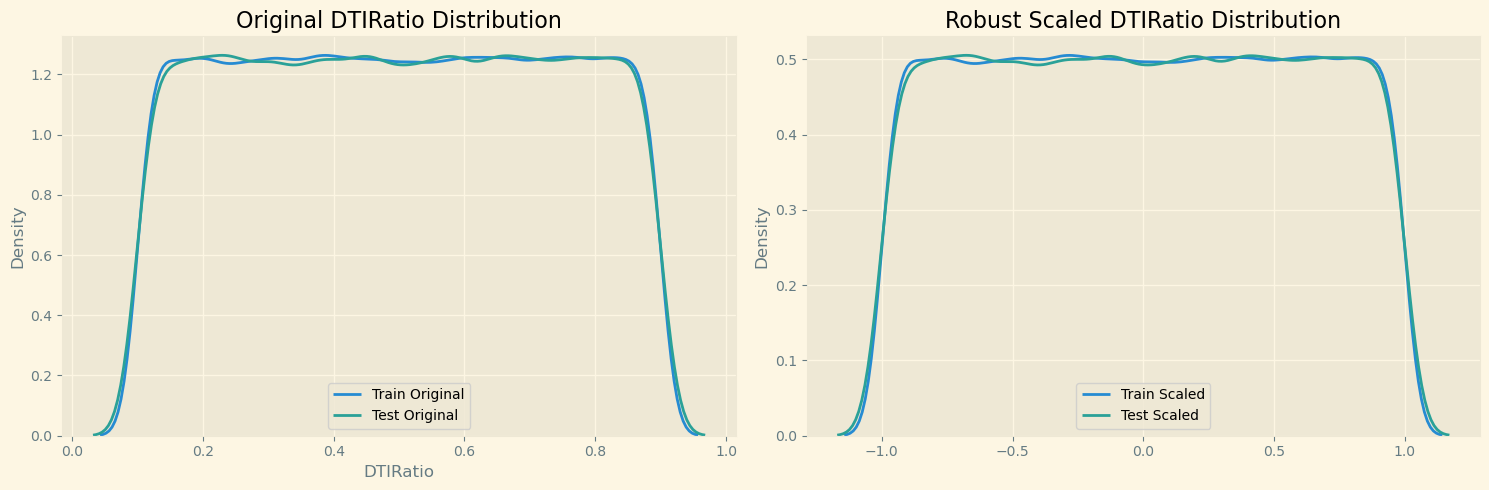


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: 0.00, Std: 0.58

Scaling Income:


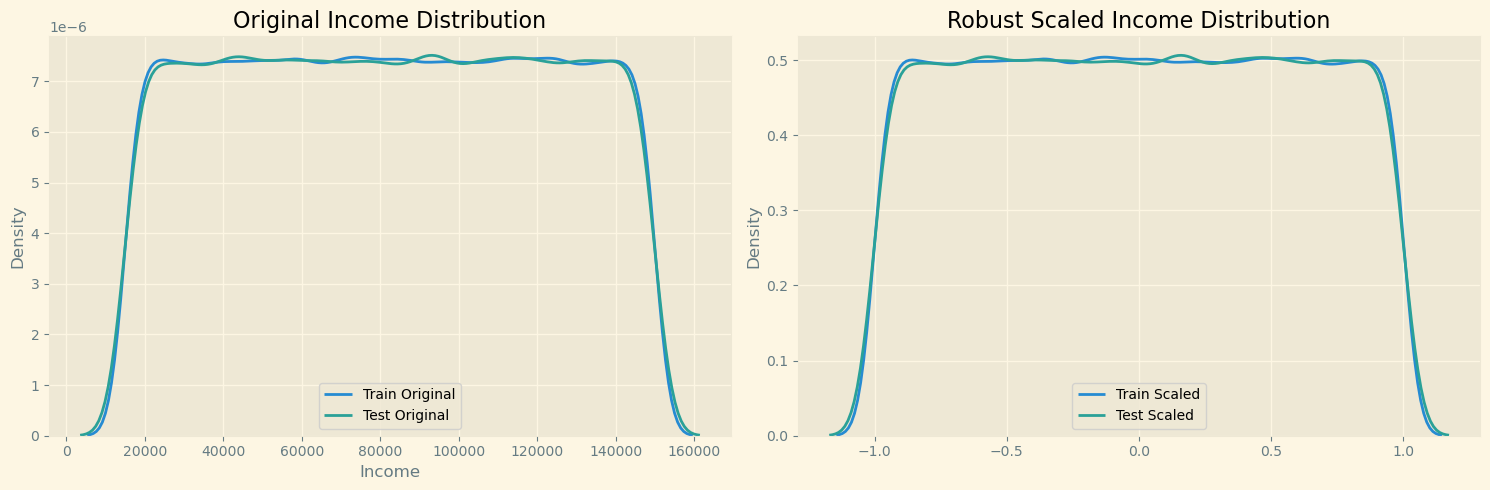


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: 0.00, Std: 0.58

Scaling NumCreditLines:


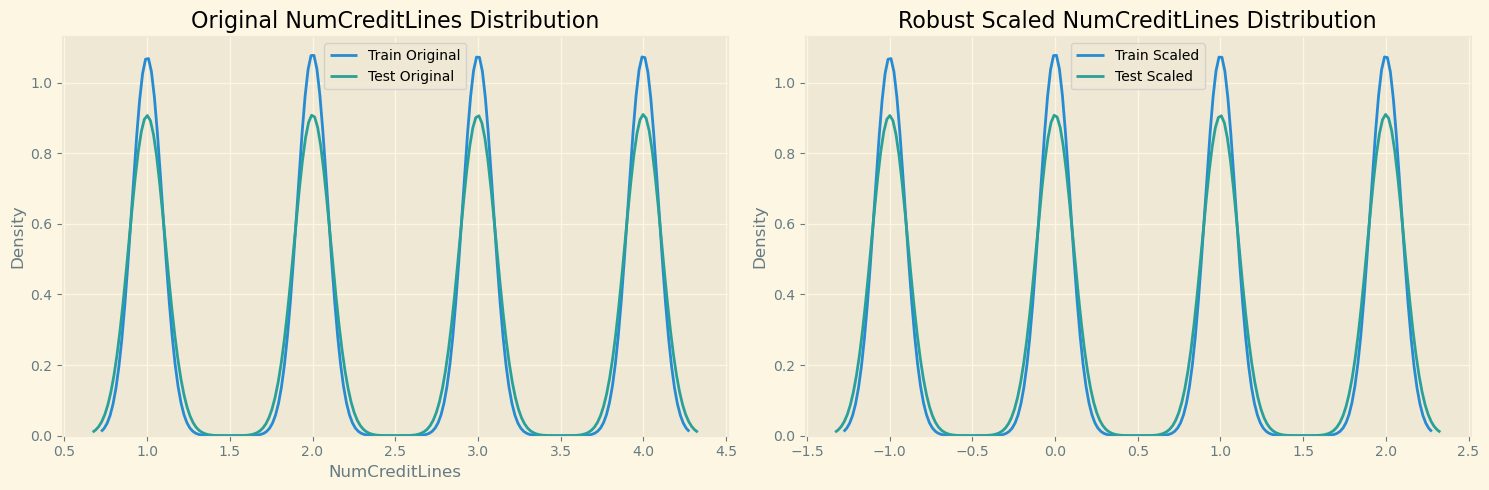


Scaled Data Statistics:
Train - Mean: 0.50, Std: 1.12
Test  - Mean: 0.50, Std: 1.12

Scaling LoanAmount:


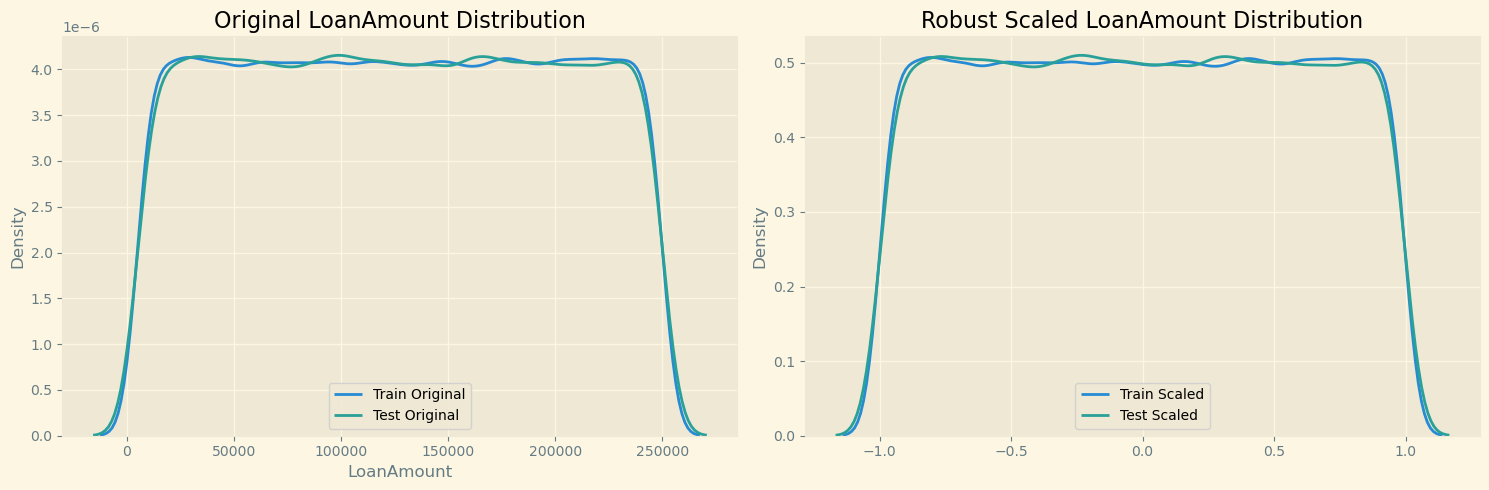


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: -0.00, Std: 0.58

Scaling InterestRate:


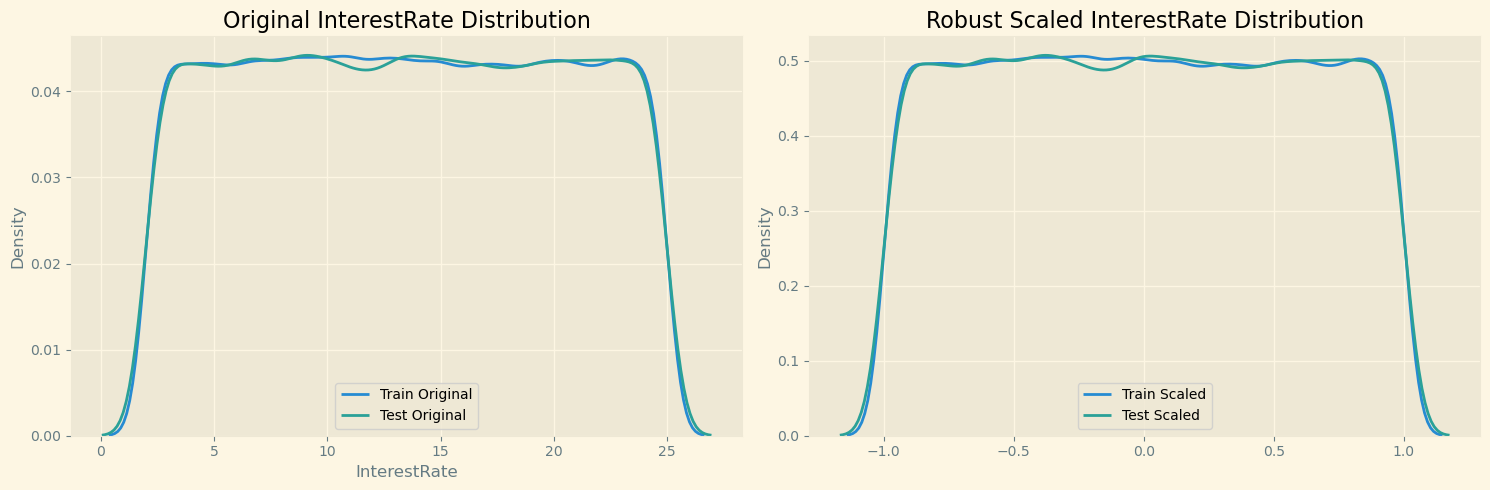


Scaled Data Statistics:
Train - Mean: 0.00, Std: 0.58
Test  - Mean: 0.00, Std: 0.58


In [34]:
# Safe preprocessing with error handling
from sklearn.preprocessing import RobustScaler
import numpy as np

def safe_scale_column(train_df, test_df, column):
    """Safely scale a column using RobustScaler with error handling"""
    try:
        # Check if column exists
        if column not in train_df.columns or column not in test_df.columns:
            print(f"Error: Column '{column}' not found")
            return None, None
        
        # Handle null values
        train_data = train_df[column].dropna()
        test_data = test_df[column].dropna()
        
        # Reshape for sklearn
        train_reshaped = train_data.values.reshape(-1, 1)
        test_reshaped = test_data.values.reshape(-1, 1)
        
        # Apply robust scaling
        scaler = RobustScaler()
        train_scaled = scaler.fit_transform(train_reshaped)
        test_scaled = scaler.transform(test_reshaped)
        
        # Visualize before and after
        plt.figure(figsize=(15, 5))
        
        # Original distribution
        plt.subplot(121)
        sns.kdeplot(data=train_data, label='Train Original')
        sns.kdeplot(data=test_data, label='Test Original')
        plt.title(f'Original {column} Distribution')
        plt.legend()
        
        # Scaled distribution
        plt.subplot(122)
        sns.kdeplot(data=train_scaled.flatten(), label='Train Scaled')
        sns.kdeplot(data=test_scaled.flatten(), label='Test Scaled')
        plt.title(f'Robust Scaled {column} Distribution')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        return train_scaled.flatten(), test_scaled.flatten()
        
    except Exception as e:
        print(f"Error processing {column}: {str(e)}")
        return None, None

# Test scaling on numerical columns
numerical_columns = ['DTIRatio', 'Income', 'NumCreditLines', 'LoanAmount', 'InterestRate']

print("Testing Robust Scaling on Numerical Variables")
print("=" * 60)

for col in numerical_columns:
    print(f"\nScaling {col}:")
    scaled_train, scaled_test = safe_scale_column(train_df, test_df, col)
    
    if scaled_train is not None:
        # Print summary statistics of scaled data
        print("\nScaled Data Statistics:")
        print(f"Train - Mean: {scaled_train.mean():.2f}, Std: {scaled_train.std():.2f}")
        print(f"Test  - Mean: {scaled_test.mean():.2f}, Std: {scaled_test.std():.2f}")
        

# Complete Data Preprocessing Pipeline

## Variable Transformations
1. **Log Transformed Variables**
   - `LoanAmount` → `log_LoanAmount`
   - `Income` → `log_Income`

2. **Binned Variables**
   - `NumCreditLines` → `NumCreditLines_binned` (5 bins: 1-5)

3. **Robust Scaled Variables**
   - `DTIRatio` → `DTIRatio_scaled`

4. **Unchanged Numerical Variables**
   - `InterestRate` (kept as original)
   - `Age`
   - `CreditScore`
   - `MonthsEmployed`
   - `LoanTerm`

5. **Encoded Categorical Variables**
   - `Education` → `Education_encoded`
   - `EmploymentType` → `EmploymentType_encoded`
   - `MaritalStatus` → `MaritalStatus_encoded`
   - `HasMortgage` → `HasMortgage_encoded`
   - `HasDependents` → `HasDependents_encoded`
   - `LoanPurpose` → `LoanPurpose_encoded`
   - `HasCoSigner` → `HasCoSigner_encoded`

6. **Special Handling**
   - `Default`: Kept in X_train, removed from X_test
   - `LoanID`: Kept in X_test, removed from X_train

In [10]:
print("Available styles:", plt.style.available)

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## MODEL CREATION

### We'll implement the following specific preprocessing steps:
    1. Log transformation for LoanAmount and Income
    2. NumCreditLines: binning → numerical → compatibility conversion
    3. InterestRate: keep as is
    4. DTIRatio: robust scaling
    5. Categorical variables: numerical conversion
    6. Handle Default and LoanID columns properly

In [35]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Log transformation for LoanAmount and Income

print("=== Applying Log Transformations ===")
train_df['log_LoanAmount'] = np.log1p(train_df['LoanAmount'])
train_df['log_Income'] = np.log1p(train_df['Income'])
test_df['log_LoanAmount'] = np.log1p(test_df['LoanAmount'])
test_df['log_Income'] = np.log1p(test_df['Income'])

# 2. NumCreditLines processing


print("\n=== Processing NumCreditLines ===")
# Create bins
bins = [0, 2, 4, 6, 8, float('inf')]
labels = [1, 2, 3, 4, 5]  # Numerical labels
train_df['NumCreditLines_binned'] = pd.cut(train_df['NumCreditLines'], 
                                          bins=bins, 
                                          labels=labels,
                                          include_lowest=True)
test_df['NumCreditLines_binned'] = pd.cut(test_df['NumCreditLines'], 
                                         bins=bins, 
                                         labels=labels,
                                         include_lowest=True)

# Convert to numerical
train_df['NumCreditLines_binned'] = train_df['NumCreditLines_binned'].astype(float)
test_df['NumCreditLines_binned'] = test_df['NumCreditLines_binned'].astype(float)

# 3. InterestRate stays as is

print("\n=== InterestRate kept as original ===")

# 4. Robust scaling for DTIRatio

print("\n=== Applying Robust Scaling to DTIRatio ===")
robust_scaler = RobustScaler()
train_df['DTIRatio_scaled'] = robust_scaler.fit_transform(train_df[['DTIRatio']])
test_df['DTIRatio_scaled'] = robust_scaler.transform(test_df[['DTIRatio']])

# 5. Convert categorical variables to numerical

print("\n=== Converting Categorical Variables to Numerical ===")
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 
                   'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    train_df[f'{col}_encoded'] = label_encoders[col].fit_transform(train_df[col])
    test_df[f'{col}_encoded'] = label_encoders[col].transform(test_df[col])

# 6. Prepare final feature sets

print("\n=== Preparing Final Feature Sets ===")
features = [
    'log_LoanAmount', 'log_Income',  # Log transformed
    'NumCreditLines_binned',         # Binned numerical
    'InterestRate',                  # Original
    'DTIRatio_scaled',              # Robust scaled
    'Age', 'CreditScore', 'MonthsEmployed', 'LoanTerm',  # Other numericals
] + [f'{col}_encoded' for col in categorical_cols]  # Encoded categoricals

# Create X_train (with Default) and X_test (with LoanID)
X_train = train_df[features + ['Default']].copy()
X_test = test_df[features + ['LoanID']].copy()

# Create target variable
y = train_df['Default']

print("\n=== Final Dataset Shapes ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("\nFeatures used:", features)

# Display sample of processed data
print("\nSample of X_train:")
display(X_train.head())
print("\nSample of X_test:")
display(X_test.head())

=== Applying Log Transformations ===

=== Processing NumCreditLines ===

=== InterestRate kept as original ===

=== Applying Robust Scaling to DTIRatio ===

=== Converting Categorical Variables to Numerical ===

=== Preparing Final Feature Sets ===

=== Final Dataset Shapes ===
X_train shape: (255347, 17)
X_test shape: (109435, 17)

Features used: ['log_LoanAmount', 'log_Income', 'NumCreditLines_binned', 'InterestRate', 'DTIRatio_scaled', 'Age', 'CreditScore', 'MonthsEmployed', 'LoanTerm', 'Education_encoded', 'EmploymentType_encoded', 'MaritalStatus_encoded', 'HasMortgage_encoded', 'HasDependents_encoded', 'LoanPurpose_encoded', 'HasCoSigner_encoded']

Sample of X_train:


,log_LoanAmount,log_Income,NumCreditLines_binned,InterestRate,DTIRatio_scaled,Age,CreditScore,MonthsEmployed,LoanTerm,Education_encoded,EmploymentType_encoded,MaritalStatus_encoded,HasMortgage_encoded,HasDependents_encoded,LoanPurpose_encoded,HasCoSigner_encoded,Default
0,10.831470,11.362044,2.0,15.23,-0.150,56,520,80,36,0,0,0,1,1,4,1,0
1,11.731587,10.828401,1.0,4.81,0.450,69,458,15,60,2,0,1,0,0,4,1,0
2,11.769032,11.341057,2.0,21.17,-0.475,46,451,26,24,2,3,0,1,1,0,0,1
3,10.709963,10.364514,2.0,7.07,-0.675,32,743,0,24,1,0,1,0,0,1,0,0
4,9.120416,9.925151,2.0,6.51,0.575,60,633,8,48,0,3,0,0,1,0,0,0



Sample of X_test:


,log_LoanAmount,log_Income,NumCreditLines_binned,InterestRate,DTIRatio_scaled,Age,CreditScore,MonthsEmployed,LoanTerm,Education_encoded,EmploymentType_encoded,MaritalStatus_encoded,HasMortgage_encoded,HasDependents_encoded,LoanPurpose_encoded,HasCoSigner_encoded,LoanID
0,10.687343,11.787872,1.0,6.10,-0.925,32,802,23,24,1,0,0,1,0,4,0,7RYZGMKJIR
1,9.820269,11.807928,1.0,12.99,0.225,61,369,87,60,1,2,2,0,0,1,1,JDL5RH07AM
2,11.930154,11.659706,2.0,5.51,0.800,55,563,3,48,0,0,2,1,1,4,1,STAL716Y79
3,10.929350,11.461327,1.0,23.93,0.675,58,337,24,36,0,3,0,0,0,1,0,SO0KKJ3IQB
4,12.153721,11.180636,2.0,22.05,-0.150,63,451,52,48,3,3,2,1,0,0,0,T99CWTYDCP


#### TRAINING THE MODEL


=== Training Logistic Regression ===
Fold 1 AUC: 0.7442
Fold 1 Extreme Cases AUC: 0.7540
Fold 2 AUC: 0.7472
Fold 2 Extreme Cases AUC: 0.7436
Fold 3 AUC: 0.7460
Fold 3 Extreme Cases AUC: 0.7508
Fold 4 AUC: 0.7522
Fold 4 Extreme Cases AUC: 0.7630
Fold 5 AUC: 0.7475
Fold 5 Extreme Cases AUC: 0.7451

Logistic Regression Average AUC: 0.7474 ± 0.0026
Logistic Regression Extreme Cases Average AUC: 0.7513 ± 0.0069

=== Training Random Forest ===
Fold 1 AUC: 0.7240
Fold 1 Extreme Cases AUC: 0.7328
Fold 2 AUC: 0.7285
Fold 2 Extreme Cases AUC: 0.7279
Fold 3 AUC: 0.7283
Fold 3 Extreme Cases AUC: 0.7338
Fold 4 AUC: 0.7316
Fold 4 Extreme Cases AUC: 0.7507
Fold 5 AUC: 0.7275
Fold 5 Extreme Cases AUC: 0.7226

Random Forest Average AUC: 0.7280 ± 0.0024
Random Forest Extreme Cases Average AUC: 0.7336 ± 0.0095

=== Training Gradient Boosting ===
Fold 1 AUC: 0.7490
Fold 1 Extreme Cases AUC: 0.7590
Fold 2 AUC: 0.7534
Fold 2 Extreme Cases AUC: 0.7507
Fold 3 AUC: 0.7526
Fold 3 Extreme Cases AUC: 0.7588
Fold

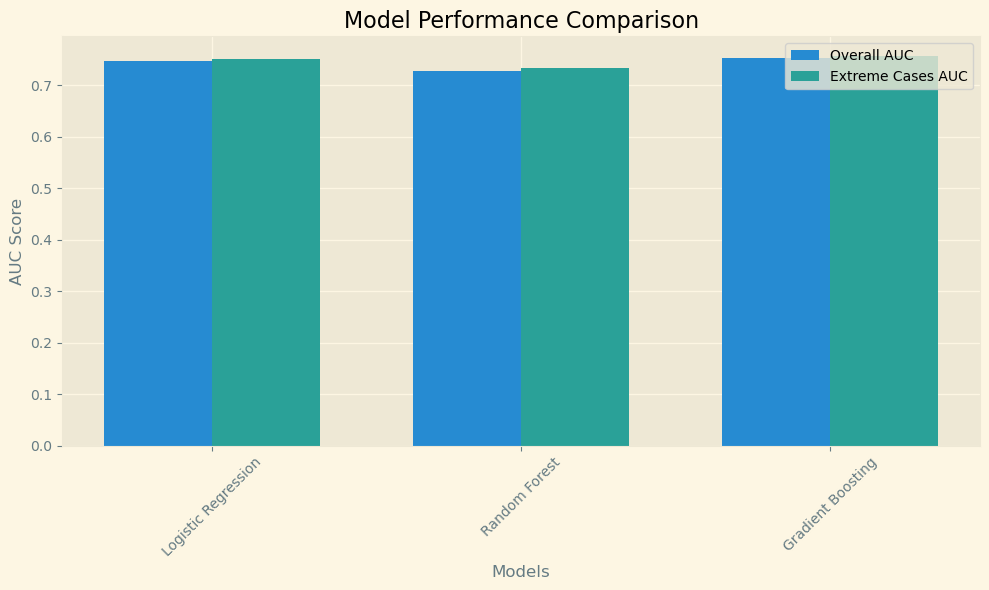


=== Model Performance Summary ===


,Overall AUC,Extreme Cases AUC
Logistic Regression,0.7474,0.7513
Random Forest,0.7280,0.7336
Gradient Boosting,0.7525,0.7572


In [36]:
# Model Training and Evaluation with fixed indexing
from sklearn.model_selection import StratifiedKFold
import numpy as np

def train_evaluate_model(model, X, y, model_name):
    # Initialize stratified K-fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store AUC scores
    auc_scores = []
    extreme_case_predictions = []
    
    # Define extreme cases (e.g., high loan amounts or low credit scores)
    extreme_mask = ((X['log_LoanAmount'] > np.percentile(X['log_LoanAmount'], 90)) | 
                   (X['CreditScore'] < np.percentile(X['CreditScore'], 10))).values  # Convert to numpy array
    
    print(f"\n=== Training {model_name} ===")
    
    # Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        # Split data
        X_fold_train = X.iloc[train_idx]
        y_fold_train = y.iloc[train_idx]
        X_fold_val = X.iloc[val_idx]
        y_fold_val = y.iloc[val_idx]
        
        # Train model
        model.fit(X_fold_train, y_fold_train)
        
        # Get predictions
        y_pred = model.predict_proba(X_fold_val)[:, 1]
     
        
        # Calculate AUC
        auc = roc_auc_score(y_fold_val, y_pred)
        auc_scores.append(auc)
        
        # Monitor extreme cases
        val_extreme_mask = extreme_mask[val_idx]
        if np.any(val_extreme_mask):
            extreme_preds = y_pred[val_extreme_mask]
            extreme_true = y_fold_val.iloc[val_extreme_mask]
            extreme_auc = roc_auc_score(extreme_true, extreme_preds)
            extreme_case_predictions.append(extreme_auc)
        
        print(f"Fold {fold+1} AUC: {auc:.4f}")
        if np.any(val_extreme_mask):
            print(f"Fold {fold+1} Extreme Cases AUC: {extreme_auc:.4f}")
    
    print(f"\n{model_name} Average AUC: {np.mean(auc_scores):.4f} ± {np.std(auc_scores):.4f}")
    if extreme_case_predictions:
        print(f"{model_name} Extreme Cases Average AUC: {np.mean(extreme_case_predictions):.4f} ± {np.std(extreme_case_predictions):.4f}")
    
    return np.mean(auc_scores), np.mean(extreme_case_predictions) if extreme_case_predictions else None

# Prepare data for modeling
features_for_model = [col for col in features if col != 'LoanID']
X = X_train[features_for_model].copy()
y = X_train['Default']

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),  # Increased max_iter
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    auc, extreme_auc = train_evaluate_model(model, X, y, model_name)
    results[model_name] = {'AUC': auc, 'Extreme_AUC': extreme_auc}

# Plot results
plt.figure(figsize=(10, 6))
x = np.arange(len(results))
width = 0.35

plt.bar(x - width/2, [results[m]['AUC'] for m in results.keys()], width, label='Overall AUC')
plt.bar(x + width/2, [results[m]['Extreme_AUC'] for m in results.keys()], width, label='Extreme Cases AUC')

plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Model Performance Comparison')
plt.xticks(x, results.keys(), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print summary
print("\n=== Model Performance Summary ===")
summary_df = pd.DataFrame(results).T
summary_df.columns = ['Overall AUC', 'Extreme Cases AUC']
display(summary_df.round(4))

### Optimisation

1. Enhanced data engineer


In [38]:
# Import additional libraries
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

def enhanced_feature_engineering(df):
    """
    Enhanced feature engineering function with additional features
    """
    # Create copy to avoid modifying original
    df = df.copy()
    
    # 1. Ratio Features
    df['income_to_loan'] = df['Income'] / df['LoanAmount']
    df['monthly_payment'] = (df['LoanAmount'] * (df['InterestRate']/100/12) * 
                           (1 + df['InterestRate']/100/12)**(df['LoanTerm']*12)) / \
                           ((1 + df['InterestRate']/100/12)**(df['LoanTerm']*12) - 1)
    df['payment_to_income'] = df['monthly_payment'] / df['Income']
    
    # 2. Interaction Features
    df['credit_income_ratio'] = df['CreditScore'] * df['Income'] / 100000
    df['employment_credit_score'] = df['MonthsEmployed'] * df['CreditScore'] / 1000
    
    # 3. Polynomial Features for important numerical columns
    num_cols = ['Income', 'CreditScore', 'DTIRatio']
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(df[num_cols])
    poly_features = pd.DataFrame(poly_features[:, len(num_cols):],
                               columns=[f'poly_{i}' for i in range(poly_features.shape[1]-len(num_cols))])
    df = pd.concat([df, poly_features], axis=1)
    
    # 4. Log Transform for skewed features
    skewed_features = ['Income', 'LoanAmount', 'MonthsEmployed']
    for feature in skewed_features:
        df[f'log_{feature}'] = np.log1p(df[feature].clip(lower=0))
    
    # 5. Categorical Encoding
    cat_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
    le = LabelEncoder()
    for col in cat_cols:
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        
    # 6. Binary Feature Interactions
    binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
    # Convert Yes/No to 1/0
    for col in binary_cols:
        df[col] = (df[col] == 'Yes').astype(int)
    
    # Create binary interactions
    for i in range(len(binary_cols)):
        for j in range(i+1, len(binary_cols)):
            df[f'{binary_cols[i]}_{binary_cols[j]}_interaction'] = df[binary_cols[i]] * df[binary_cols[j]]
    
    return df

In [39]:
# Load and preprocess the data
print("Loading and preprocessing data...")
X = train_df.drop('Default', axis=1)
y = train_df['Default']

# Apply enhanced feature engineering
print("Applying enhanced feature engineering...")
X_enhanced = enhanced_feature_engineering(X)

# Feature Selection
print("Selecting best features...")
# Get only numeric columns for feature selection
numeric_X = X_enhanced.select_dtypes(include=['int64', 'float64'])
print(f"\nNumber of numeric features available: {numeric_X.shape[1]}")

# Use all features initially, then we can select top N based on scores
selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_selected = selector.fit_transform(numeric_X, y)
numeric_cols = numeric_X.columns

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'feature': numeric_cols,
    'score': selector.scores_
}).sort_values('score', ascending=False)

print("\nTop 20 most important features:")
display(feature_importance.head(20))

# Select top 20 features for our model
top_features = feature_importance.head(20)['feature'].tolist()

print("\nSelected features for modeling:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

Loading and preprocessing data...
Applying enhanced feature engineering...
Selecting best features...

Number of numeric features available: 38

Top 20 most important features:


,feature,score
22,HasCoSigner_encoded,0.036325
11,HasCoSigner,0.035887
10,HasDependents,0.034914
9,HasMortgage,0.034750
20,HasDependents_encoded,0.034697
14,NumCreditLines_binned,0.033290
19,HasMortgage_encoded,0.033133
18,MaritalStatus_encoded,0.017978
25,payment_to_income,0.017927
0,Age,0.015460



Selected features for modeling:
1. HasCoSigner_encoded
2. HasCoSigner
3. HasDependents
4. HasMortgage
5. HasDependents_encoded
6. NumCreditLines_binned
7. HasMortgage_encoded
8. MaritalStatus_encoded
9. payment_to_income
10. Age
11. income_to_loan
12. EmploymentType_encoded
13. Education_encoded
14. monthly_payment
15. LoanPurpose_encoded
16. NumCreditLines
17. LoanTerm
18. HasDependents_HasCoSigner_interaction
19. HasMortgage_HasDependents_interaction
20. InterestRate


Logistic regression is a statistical method used for binary classification problems, where the goal is to predict the outcome of a categorical dependent variable based on one or more independent variables. Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability that a given input point belongs to a particular category.

Here's a simple breakdown:

Purpose: The main purpose of logistic regression is to model the relationship between the dependent variable (often binary, like "yes" or "no") and one or more independent variables (which can be continuous or categorical). It helps in understanding how the independent variables influence the likelihood of a certain outcome.

How It Works:
Logistic regression uses a logistic function (also known as the sigmoid function) to transform the output of a linear equation into a probability value between 0 and 1.
The logistic function is defined as: [ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} ] where (P(Y=1|X)) is the probability of the outcome being 1 (e.g., success), (e) is the base of the natural logarithm, and (\beta_0, \beta_1, ..., \beta_n) are the coefficients of the model.
Example:

Imagine you want to predict whether a student will pass (1) or fail (0) an exam based on their study hours and attendance. Logistic regression will analyze the relationship between these independent variables (study hours and attendance) and the binary outcome (pass or fail). The model will output a probability, say 0.85, indicating an 85% chance that the student will pass.

Benefits:
Interpretability: The coefficients in logistic regression can be interpreted as the change in the log odds of the outcome for a one-unit change in the predictor variable.
Probabilistic Output: It provides probabilities, which can be useful for decision-making processes.
Robustness: Logistic regression performs well even when the assumptions of linear regression are violated.
In summary, logistic regression is a powerful and widely used technique for binary classification tasks, providing insights into the relationships between variables and the likelihood of outcomes.



# Detailed Analysis of Categorical Variables

Let's investigate the relationship between our target variable (loan default) and the four main categorical variables:
1. Purpose of the loan
2. Home ownership status
3. Address state
4. Employment length

We'll look at:
- Distribution of each category
- Default rates within each category
- Statistical significance of relationships


=== Analysis for LoanPurpose ===

Overall Distribution:

Category Distribution (%):
Business: 20.09%
Home: 20.08%
Education: 19.97%
Other: 19.94%
Auto: 19.91%

Default Rates by Category:

Default Rates (%):
Business: 12.33%
Auto: 11.88%
Education: 11.84%
Other: 11.79%
Home: 10.23%

Chi-square p-value: 0.0000000000


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


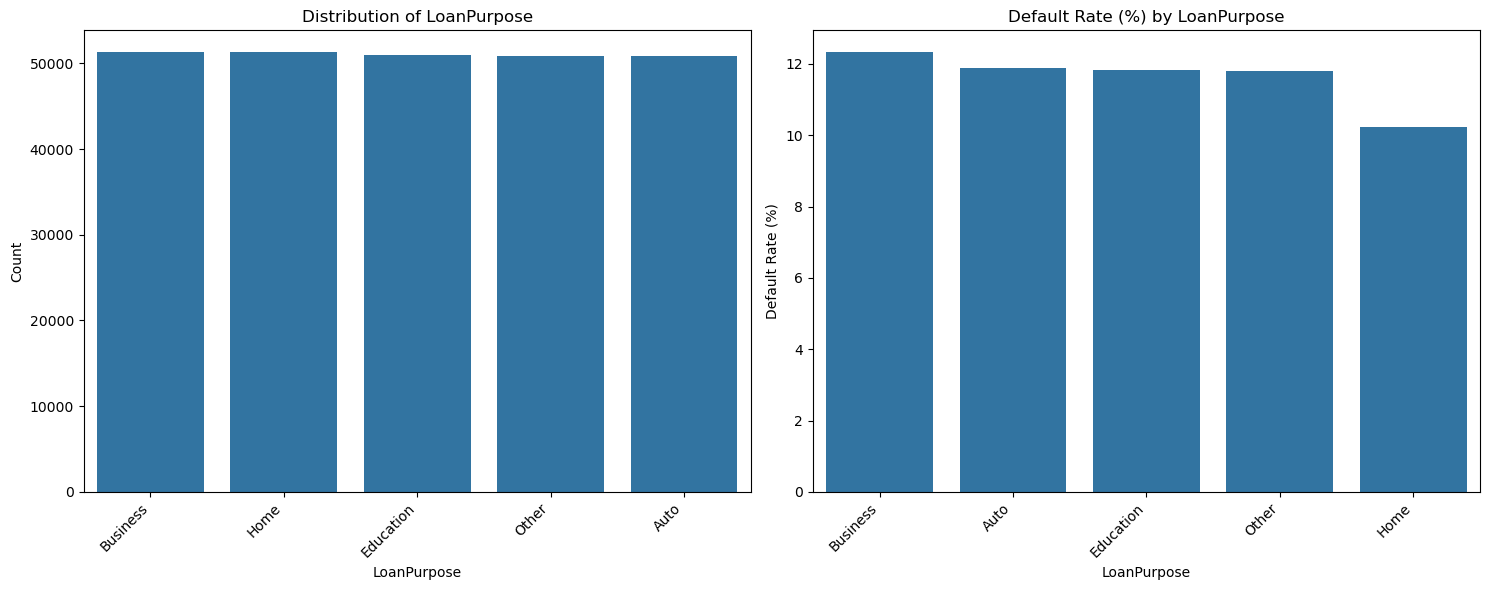


=== Analysis for EmploymentType ===

Overall Distribution:

Category Distribution (%):
Part-time: 25.13%
Unemployed: 25.00%
Self-employed: 24.95%
Full-time: 24.93%

Default Rates by Category:

Default Rates (%):
Unemployed: 13.55%
Part-time: 11.97%
Self-employed: 11.46%
Full-time: 9.46%

Chi-square p-value: 0.0000000000


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


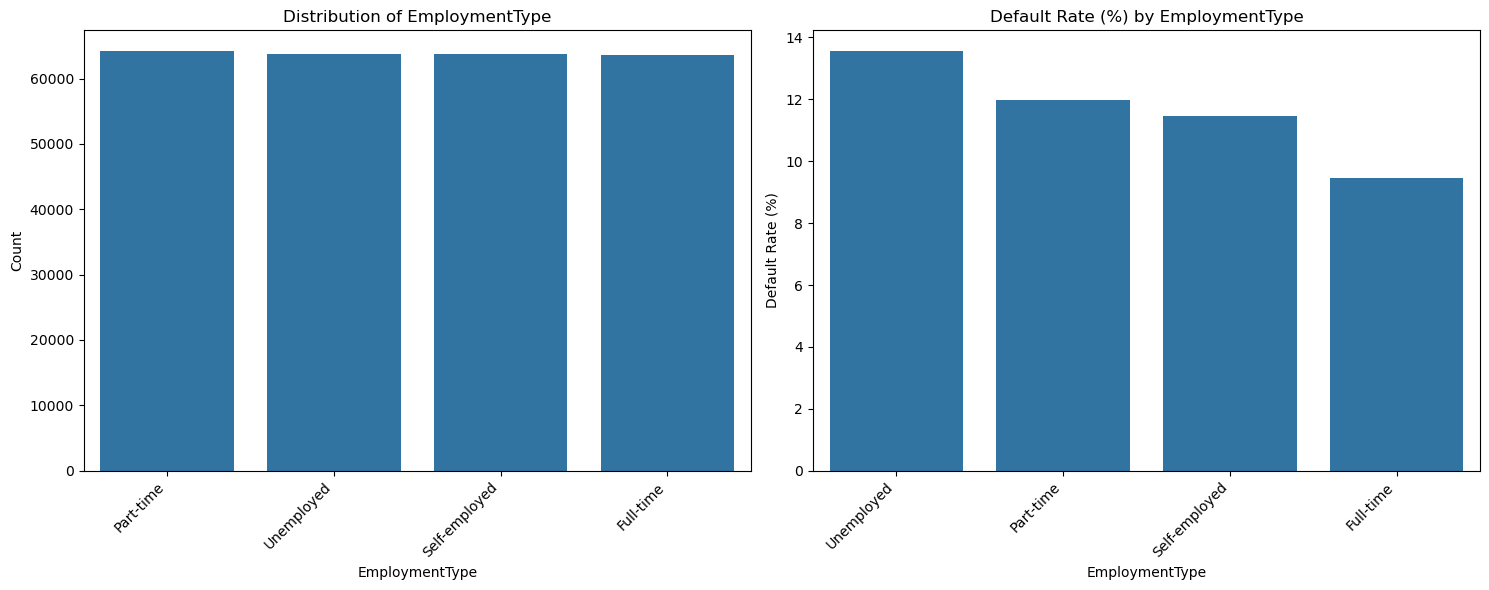


=== Analysis for Education ===

Overall Distribution:

Category Distribution (%):
Bachelor's: 25.21%
High School: 25.03%
Master's: 24.88%
PhD: 24.88%

Default Rates by Category:

Default Rates (%):
High School: 12.88%
Bachelor's: 12.10%
Master's: 10.87%
PhD: 10.59%

Chi-square p-value: 0.0000000000


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


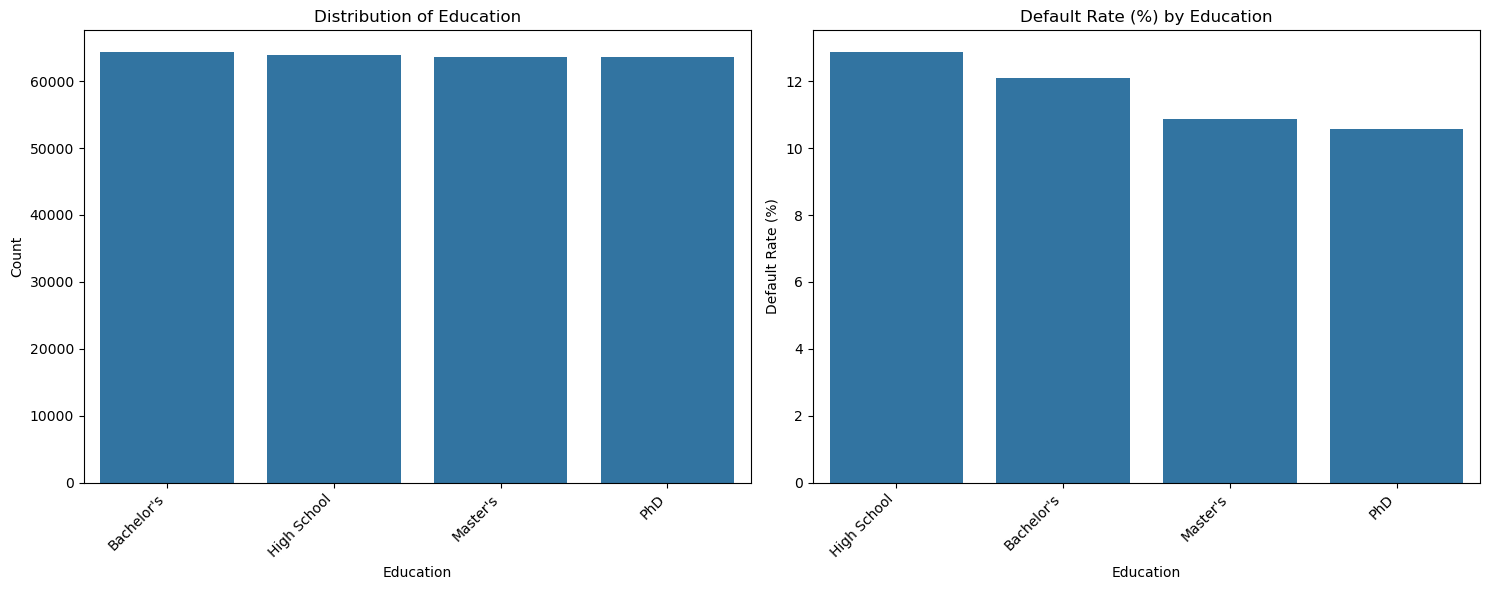


=== Analysis for MaritalStatus ===

Overall Distribution:

Category Distribution (%):
Married: 33.41%
Divorced: 33.30%
Single: 33.29%

Default Rates by Category:

Default Rates (%):
Divorced: 12.53%
Single: 11.91%
Married: 10.40%

Chi-square p-value: 0.0000000000


/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
/var/folders/2g/b7_ds6rx6f59_76_6q87lc1c0000gn/T/ipykernel_32010/1087535717.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


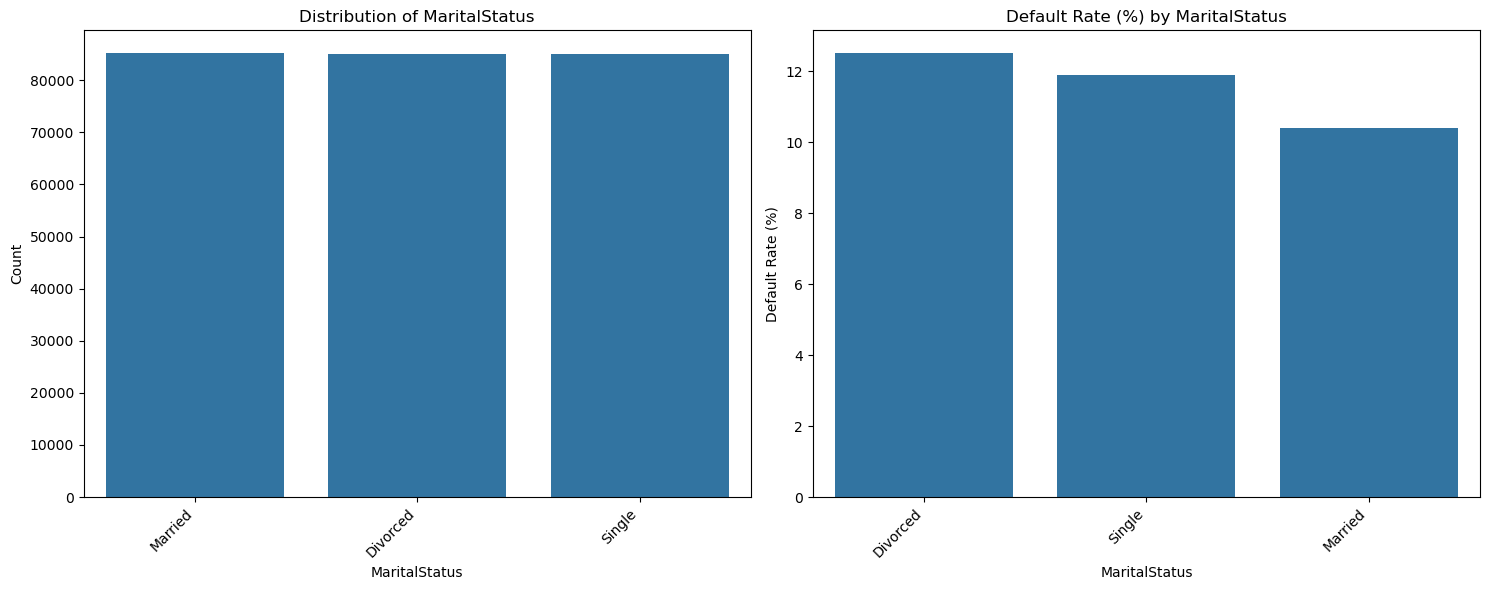


=== Cross Analysis of High-Risk Categories ===

Top 3 riskiest LoanPurpose categories:
Business: 12.33% default rate
Auto: 11.88% default rate
Education: 11.84% default rate

Top 3 riskiest EmploymentType categories:
Unemployed: 13.55% default rate
Part-time: 11.97% default rate
Self-employed: 11.46% default rate

Top 3 riskiest Education categories:
High School: 12.88% default rate
Bachelor's: 12.10% default rate
Master's: 10.87% default rate

Top 3 riskiest MaritalStatus categories:
Divorced: 12.53% default rate
Single: 11.91% default rate
Married: 10.40% default rate

=== Risk Segment Analysis ===

Default rates by number of high-risk categories:

Risk Segment Analysis:
(Number of high-risk categories a loan falls into)
              Count  Default_Rate  Default_Rate_Pct
RiskSegment                                        
1              6271        0.0785              7.85
2             47890        0.0984              9.84
3            114800        0.1141             11.41
4     

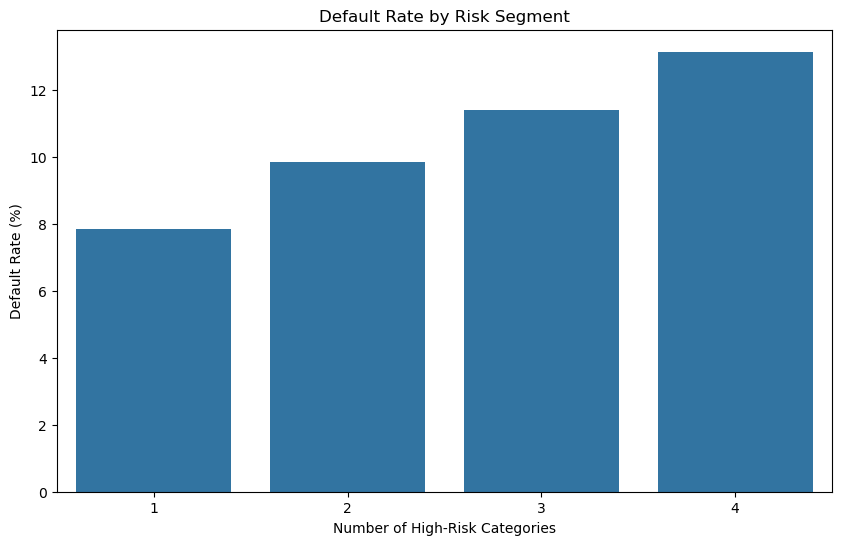

In [40]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Make sure we're using the right dataframe
df = train_df.copy()

# Set up the plotting style
plt.style.use('default')


# Function to analyze categorical variable
def analyze_categorical(df, cat_column, target='Default'):
    # Overall distribution
    print(f"\n=== Analysis for {cat_column} ===")
    print("\nOverall Distribution:")
    dist = df[cat_column].value_counts()
    dist_pct = df[cat_column].value_counts(normalize=True) * 100
    print("\nCategory Distribution (%):")
    for cat, pct in dist_pct.items():
        print(f"{cat}: {pct:.2f}%")
    
    # Default rates by category
    print("\nDefault Rates by Category:")
    default_rates = df.groupby(cat_column)[target].mean().sort_values(ascending=False) * 100
    print("\nDefault Rates (%):")
    for cat, rate in default_rates.items():
        print(f"{cat}: {rate:.2f}%")
    
    # Chi-square test
    contingency = pd.crosstab(df[cat_column], df[target])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\nChi-square p-value: {p_value:.10f}")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Distribution
    sns.barplot(x=dist.index, y=dist.values, ax=ax1)
    ax1.set_title(f'Distribution of {cat_column}')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_ylabel('Count')
    
    # Plot 2: Default Rates
    sns.barplot(x=default_rates.index, y=default_rates.values, ax=ax2)
    ax2.set_title(f'Default Rate (%) by {cat_column}')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.set_ylabel('Default Rate (%)')
    
    plt.tight_layout()
    plt.show()
    
    return default_rates

# Analyze each categorical variable
categorical_vars = ['LoanPurpose', 'EmploymentType', 'Education', 'MaritalStatus']

default_rates_by_category = {}
for var in categorical_vars:
    default_rates_by_category[var] = analyze_categorical(df, var)

# Cross-analysis of top risky categories
print("\n=== Cross Analysis of High-Risk Categories ===")
# Get top 3 riskiest categories for each variable
for var in categorical_vars:
    top3_risky = default_rates_by_category[var].head(3)
    print(f"\nTop 3 riskiest {var} categories:")
    for cat, rate in top3_risky.items():
        print(f"{cat}: {rate:.2f}% default rate")

# Create risk segments
def create_risk_segment(row, default_rates_dict):
    risk_score = 0
    for var in categorical_vars:
        if row[var] in default_rates_dict[var].head(3).index:
            risk_score += 1
    return risk_score

df['RiskSegment'] = df.apply(lambda row: create_risk_segment(row, default_rates_by_category), axis=1)

# Analyze risk segments
print("\n=== Risk Segment Analysis ===")
risk_segment_stats = df.groupby('RiskSegment').agg({
    'Default': ['count', 'mean']
}).round(4)
risk_segment_stats.columns = ['Count', 'Default_Rate']
risk_segment_stats['Default_Rate_Pct'] = (risk_segment_stats['Default_Rate'] * 100).round(2)

print("\nDefault rates by number of high-risk categories:")
print("\nRisk Segment Analysis:")
print("(Number of high-risk categories a loan falls into)")
print(risk_segment_stats)

# Visualize risk segments
plt.figure(figsize=(10, 6))
sns.barplot(x=risk_segment_stats.index, 
            y=risk_segment_stats['Default_Rate_Pct'])
plt.title('Default Rate by Risk Segment')
plt.xlabel('Number of High-Risk Categories')
plt.ylabel('Default Rate (%)')
plt.show()

# Model Improvements Based on Categorical Analysis

Based on our analysis, we'll make the following improvements:

1. Create interaction features between high-risk categories
2. Add risk segment as a new feature
3. Improve feature encoding to capture risk levels
4. Add polynomial features for continuous variables with risk segments

These changes should help the model better capture the relationships between risk factors and defaults.

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# First split the data into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

def create_risk_features(df):
    """Create risk-based features from categorical variables"""
    
    # Define high-risk categories based on our analysis
    high_risk_categories = {
        'LoanPurpose': ['Business', 'Auto', 'Education'],
        'EmploymentType': ['Unemployed', 'Part-time', 'Self-employed'],
        'Education': ['High School', "Bachelor's", "Master's"],
        'MaritalStatus': ['Divorced', 'Single']
    }
    
    # Create binary features for high-risk categories
    for col, high_risk_vals in high_risk_categories.items():
        df[f'{col}_HighRisk'] = df[col].isin(high_risk_vals).astype(int)
    
    # Calculate risk score (number of high-risk categories)
    df['RiskScore'] = sum(df[f'{col}_HighRisk'] for col in high_risk_categories.keys())
    
    # Create interaction features between high-risk categories
    risk_cols = [f'{col}_HighRisk' for col in high_risk_categories.keys()]
    for i in range(len(risk_cols)):
        for j in range(i+1, len(risk_cols)):
            col1, col2 = risk_cols[i], risk_cols[j]
            df[f'Interaction_{col1}_{col2}'] = df[col1] * df[col2]
    
    return df

def improved_preprocess_data(df, is_training=True):
    """Improved preprocessing function incorporating risk-based features"""
    
    # Create a copy to avoid modifying the original dataframe
    processed_df = df.copy()
    
    # Add risk-based features
    processed_df = create_risk_features(processed_df)
    
    # Handle categorical variables with risk-aware encoding
    categorical_cols = ['LoanPurpose', 'EmploymentType', 'Education', 'MaritalStatus']
    
    # Calculate risk-based weights for each category (if training)
    if is_training:
        category_risks = {}
        for col in categorical_cols:
            risks = processed_df.groupby(col)['Default'].mean()
            category_risks[col] = risks
            
        # Save the category risks for later use
        global saved_category_risks
        saved_category_risks = category_risks
    
    # Apply risk-based encoding
    for col in categorical_cols:
        # Use saved category risks for both training and test data
        processed_df[f'{col}_Risk'] = processed_df[col].map(saved_category_risks[col])
    
    # Handle numeric variables
    numeric_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 
                   'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
    
    # Standard scaling for numeric columns
    scaler = StandardScaler()
    if is_training:
        processed_df[numeric_cols] = scaler.fit_transform(processed_df[numeric_cols])
        # Save the scaler for later use
        global saved_scaler
        saved_scaler = scaler
    else:
        processed_df[numeric_cols] = saved_scaler.transform(processed_df[numeric_cols])
    
    # Create polynomial features for important numeric variables with risk score
    poly_cols = ['CreditScore', 'DTIRatio', 'InterestRate', 'RiskScore']
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(processed_df[poly_cols])
    
    # Add polynomial features to the dataframe
    poly_feature_names = [f'Poly_{i}' for i in range(poly_features.shape[1])]
    processed_df = pd.concat([
        processed_df,
        pd.DataFrame(poly_features[:, len(poly_cols):], 
                    columns=poly_feature_names[len(poly_cols):],
                    index=processed_df.index)
    ], axis=1)
    
    # Binary variables - convert Yes/No to 1/0
    binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
    for col in binary_cols:
        processed_df[col] = (processed_df[col] == 'Yes').astype(int)
    
    # Drop original categorical columns
    processed_df = processed_df.drop(columns=categorical_cols)
    
    # Drop the ID column if it exists
    if 'LoanID' in processed_df.columns:
        processed_df = processed_df.drop('LoanID', axis=1)
    
    # Separate features and target
    if 'Default' in processed_df.columns:
        y = processed_df['Default']
        X = processed_df.drop('Default', axis=1)
        return X, y
    else:
        return processed_df
    
# Process the training data
print("Processing training data...")
X_train, y_train = improved_preprocess_data(train_df, is_training=True)

# Process the validation data
print("\nProcessing validation data...")
X_val, y_val = improved_preprocess_data(val_df, is_training=False)

# Print the new features
print("\nNew features added:")
new_features = [col for col in X_train.columns if any(x in col for x in ['HighRisk', 'Interaction', 'Risk', 'Poly'])]
for feature in new_features:
    print(f"- {feature}")

print(f"\nTotal number of features: {X_train.shape[1]}")

Processing training data...

Processing validation data...

New features added:
- LoanPurpose_HighRisk
- EmploymentType_HighRisk
- Education_HighRisk
- MaritalStatus_HighRisk
- RiskScore
- Interaction_LoanPurpose_HighRisk_EmploymentType_HighRisk
- Interaction_LoanPurpose_HighRisk_Education_HighRisk
- Interaction_LoanPurpose_HighRisk_MaritalStatus_HighRisk
- Interaction_EmploymentType_HighRisk_Education_HighRisk
- Interaction_EmploymentType_HighRisk_MaritalStatus_HighRisk
- Interaction_Education_HighRisk_MaritalStatus_HighRisk
- LoanPurpose_Risk
- EmploymentType_Risk
- Education_Risk
- MaritalStatus_Risk
- Poly_4
- Poly_5
- Poly_6
- Poly_7
- Poly_8
- Poly_9
- Poly_10
- Poly_11
- Poly_12
- Poly_13

Total number of features: 48


In [42]:
# Set up improved hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform

# Define an expanded parameter space
param_dist = {
    'n_estimators': randint(200, 400),
    'learning_rate': uniform(0.01, 0.14),
    'max_depth': randint(4, 8),
    'min_samples_split': randint(2, 15),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.7, 0.2),
    'max_features': uniform(0.6, 0.4)
}

# Initialize base model
gb_model = GradientBoostingClassifier(
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    tol=1e-4
)

# Set up cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV
print("Starting hyperparameter optimization...")
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=15,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit the random search
random_search.fit(X_train, y_train)

# Print results
print("\nBest parameters found:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest cross-validation AUC: {random_search.best_score_:.4f}")

# Evaluate on validation set
val_pred_proba = random_search.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_val, val_pred_proba)
print(f"\nValidation set AUC: {val_auc:.4f}")

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': random_search.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 most important features:")
print(feature_importance.head(15))

Starting hyperparameter optimization...
Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best parameters found:
learning_rate: 0.06243561663863076
max_depth: 4
max_features: 0.6733739159464655
min_samples_leaf: 4
min_samples_split: 14
n_estimators: 220
subsample: 0.7312037280884872

Best cross-validation AUC: 0.7512

Validation set AUC: 0.7580

Top 15 most important features:
                   feature  importance
0                      Age    0.256292
46                 Poly_12    0.118197
13              log_Income    0.108272
4           MonthsEmployed    0.095675
1                   Income    0.087669
12          log_LoanAmount    0.069752
6             InterestRate    0.069495
2               LoanAmount    0.065523
41                  Poly_7    0.015343
22     HasCoSigner_encoded    0.009355
20   HasDependents_encoded    0.008626
3              CreditScore    0.008281
40                  Poly_6    0.007280
17  EmploymentType_encoded    0.005936
43                  Pol

In [43]:
import pandas as pd

# Template for tracking feature transformations
transformation_log = pd.DataFrame([
    {"feature": "income", "transformation": "log", "new_name": "log_income"},
    # Add more rows as you apply transformations
])
display(transformation_log)

,feature,transformation,new_name
0,income,log,log_income


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

## Pipeline

In [18]:
Y = y

NameError: name 'y' is not defined

In [19]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

NameError: name 'prediction_df' is not defined

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [20]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

NameError: name 'prediction_df' is not defined

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!